# <p style="text-align: center;">Marketing Analysis</p>
# <p style="text-align: center;">Project</p>
## <p style="text-align: center;">Ally McNulty (agm3734), Chaitra Setty (cs63687), Christian Alfonso , Yashpreet Kaur (yk8742)</p>

In [1]:
###################################### loading all the required libraries ################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from string import punctuation
from nltk.corpus import stopwords
from sklearn.manifold import MDS
from sklearn import manifold, linear_model
import sys

In [2]:
############################### loading all the comments in a data frame ##########################################
df = pd.read_csv('BeerProject.csv')

df

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290


In [23]:
## EDA

#dropping null records 
df = df.dropna()

df['beer_style'].nunique()

104

In [18]:
df['counter'] = 1



beers_styles = df[['beer_style','counter']].groupby(['beer_style']).sum()

beers_styles = beers_styles.sort_values(by = 'counter', ascending = False)

beers_styles.reset_index(inplace = True)

beers_styles.to_csv('beer_styles.csv')


# beers[beers['counter']>1000]

<ipython-input-18-48d6f69c1ec9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['counter'] = 1


In [20]:


beers_name = df[['beer_name','counter']].groupby(['beer_name']).sum()

beers_name = beers_name.sort_values(by = 'counter', ascending = False)

beers_name.reset_index(inplace = True)

beers_name[:100].to_csv('beer_names_100.csv')

In [6]:

beers_name_syle = df[['beer_name','beer_style','counter']].groupby(['beer_name','beer_style']).sum()

beers_name_syle = beers_name_syle.sort_values(by = 'counter', ascending = False)

beers_name_syle.reset_index(inplace = True)

beers_name_syle[:20]

,beer_name,beer_style,counter
0,Sierra Nevada Celebration Ale,American IPA,2998
1,Sierra Nevada Pale Ale,American Pale Ale (APA),2586
2,Founders Breakfast Stout,American Double / Imperial Stout,2501
3,Sierra Nevada Bigfoot Barleywine Style Ale,American Barleywine,2491
4,La Fin Du Monde,Tripel,2480
5,Samuel Adams Boston Lager,Vienna Lager,2416
6,Chocolate Stout,American Stout,2233
7,Dead Guy Ale,Maibock / Helles Bock,2229
8,Trappistes Rochefort 10,Quadrupel (Quad),2170
9,Sierra Nevada Torpedo Extra IPA,American IPA,2028


In [7]:

reviews_beer_style = df[['beer_style','counter','review_overall','review_appearance','review_palette','review_taste', 
              'review_aroma','beer_ABV']].groupby(['beer_style']).agg({'counter': 'sum','review_overall':'mean','review_appearance':'mean','review_palette':'mean',
                                                             'review_taste':'mean', 'review_aroma':'mean','beer_ABV':'mean'})

reviews_beer_style['quartile_beer_style'] = (pd.qcut(reviews_beer_style['review_overall'],4,retbins=False, labels = ['4','3','2','1']))



reviews_beer_style = reviews_beer_style.sort_values(by = 'review_overall', ascending = False)

reviews_beer_style.reset_index(inplace = True)

reviews_beer_style['%count'] = (reviews_beer_style['counter'] * 100)/reviews_beer_style['counter'].sum()

reviews_beer_style



,beer_style,counter,review_overall,review_appearance,review_palette,review_taste,review_aroma,beer_ABV,quartile_beer_style,%count
0,Gueuze,1574,4.140724,4.013024,4.150889,4.087357,4.192186,5.145362,1,0.309624
1,Berliner Weissbier,665,4.122556,3.845865,3.841353,3.943609,3.966165,4.173459,1,0.130813
2,American Double / Imperial Stout,23192,4.100595,4.217834,4.236849,4.169326,4.263518,10.149658,1,4.562139
3,Oatmeal Stout,6377,4.094637,4.180649,3.964168,4.031441,4.114239,5.806501,1,1.254431
4,Eisbock,194,4.082474,3.971649,4.069588,4.118557,4.198454,12.557629,1,0.038162
...,...,...,...,...,...,...,...,...,...,...
99,Light Lager,4168,2.921185,2.592490,2.355926,2.539107,2.495681,3.962910,4,0.819895
100,Happoshu,55,2.818182,2.763636,2.627273,2.545455,2.554545,5.600000,4,0.010819
101,Euro Strong Lager,723,2.812586,3.170816,2.823651,2.925311,2.765560,8.367773,4,0.142223
102,American Malt Liquor,1344,2.724702,2.911086,2.499256,2.723586,2.604167,7.547024,4,0.264381


In [8]:
quartile_style_summary = reviews_beer_style.groupby(['quartile_beer_style']).agg({'counter': 'sum','review_overall':'mean','review_appearance':'mean','review_palette':'mean',
                                                             'review_taste':'mean', 'review_aroma':'mean','beer_ABV':'mean'})

quartile_style_summary['%count'] = (quartile_style_summary['counter'] * 100)/quartile_style_summary['counter'].sum()

quartile_style_summary




,counter,review_overall,review_appearance,review_palette,review_taste,review_aroma,beer_ABV,%count
quartile_beer_style,,,,,,,,
4,75604,3.337590,3.401830,3.139695,3.252459,3.202779,5.660344,14.872196
3,72669,3.769838,3.791684,3.704529,3.696399,3.750713,6.607187,14.294847
2,170666,3.870719,3.882015,3.767953,3.778829,3.842224,6.506574,33.572010
1,189419,4.013654,4.014892,3.969597,3.959265,4.045484,7.130669,37.260946


C:\Users\chait\anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


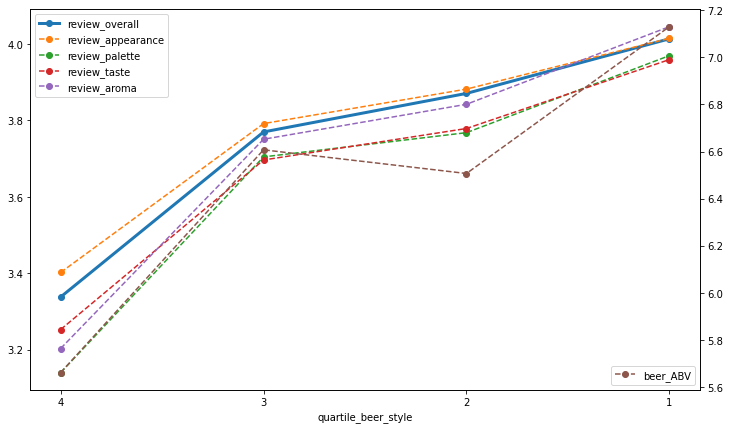

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(quartile_style_summary['review_overall'], marker='o', linewidth=3)
plt.plot(quartile_style_summary['review_appearance'],marker='o',linestyle='dashed')
plt.plot(quartile_style_summary['review_palette'],marker='o',linestyle='dashed')
plt.plot(quartile_style_summary['review_taste'],marker='o',linestyle='dashed')
plt.plot(quartile_style_summary['review_aroma'],marker='o',linestyle='dashed')

plt.legend(['review_overall','review_appearance','review_palette','review_taste','review_aroma'])
ax = quartile_style_summary['beer_ABV'].plot(secondary_y=True,marker='o',linestyle='dashed')
ax.legend(['beer_ABV'],loc = "lower right")
plt.show()

In [10]:

######################################  Corr and Linear regression at review level  ###############################################



corr = df[['review_overall','review_appearance','review_palette','review_taste', 'review_aroma','beer_ABV']].corr(method = 'pearson')

corr.style.background_gradient().set_precision(3)


,review_overall,review_appearance,review_palette,review_taste,review_aroma,beer_ABV
review_overall,1.000,0.483,0.598,0.689,0.780,0.119
review_appearance,0.483,1.000,0.545,0.552,0.531,0.252
review_palette,0.598,0.545,1.000,0.601,0.703,0.319
review_taste,0.689,0.552,0.601,1.000,0.723,0.269
review_aroma,0.780,0.531,0.703,0.723,1.000,0.272
beer_ABV,0.119,0.252,0.319,0.269,0.272,1.000


In [11]:
from sklearn import datasets
# !pip install regressors
from regressors import stats

X = df[['review_appearance','review_palette','review_taste', 'review_aroma','beer_ABV']]
y = df['review_overall']


model = linear_model.LinearRegression().fit(X,y)
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("r_squared\n", r_squared, "\n\nadjusted_r_squared\n", adjusted_r_squared,"\n")


print("Coeff:\n'review_appearance','review_palette','review_taste', 'review_aroma', 'Beer_ABV'\n", model.coef_,"\nIntercept", model.intercept_)

print('\npvalues')
print(stats.coef_pval(model, X, y))


ModuleNotFoundError: No module named 'regressors'

In [ ]:
regression_summ_df = pd.DataFrame({'Model':['Review level'], 'Quartile':['All'],'Adj Rsq':[adjusted_r_squared],
                                  'Coeff_review_appearance':[model.coef_[0]],
                                  'Coeff_review_palette':[model.coef_[1]],
                                  'Coeff_review_taste':[model.coef_[2]],
                                  'Coeff_review_aroma':[model.coef_[3]],
                                  'Coeff_Beer_ABV':[model.coef_[4]],
                                    'p_val_app':[stats.coef_pval(model, X, y)[0]],
                                   'p_val_pall':[stats.coef_pval(model, X, y)[1]],
                                   'p_val_taste':[stats.coef_pval(model, X, y)[2]],
                                   'p_val_aroma':[stats.coef_pval(model, X, y)[3]],
                                   'p_val_ABV':[stats.coef_pval(model, X, y)[4]]
                                  })


regression_summ_df = regression_summ_df.transpose()

regression_summ_df

In [ ]:
######################################  Corr and Linear regression at beer style level  ###############################################

corr = reviews_beer_style[['review_overall','review_appearance','review_palette','review_taste', 'review_aroma', 'beer_ABV']].corr(method = 'pearson')

corr.style.background_gradient().set_precision(3)




In [ ]:
### All Quartile combined regression



X = reviews_beer_style[['review_appearance','review_palette','review_taste', 'review_aroma','beer_ABV']]
y = reviews_beer_style['review_overall']

print("Quartile = All" )
model = linear_model.LinearRegression().fit(X,y)
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("r_squared\n", r_squared, "\n\nadjusted_r_squared\n", adjusted_r_squared,"\n")
print("Coeff:\n'review_appearance','review_palette','review_taste', 'review_aroma', 'beer_ABV'\n", model.coef_,"\nIntercept", model.intercept_)
print('\npvalues')
print(stats.coef_pval(model, X, y))



In [ ]:
regression_summ_df['1'] = ['Beer Style level', 'All',adjusted_r_squared,
                           model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.coef_[4],
                           stats.coef_pval(model, X, y)[0],stats.coef_pval(model, X, y)[1],stats.coef_pval(model, X, y)[2],
                           stats.coef_pval(model, X, y)[3],stats.coef_pval(model, X, y)[4]]
regression_summ_df                           
                           

In [ ]:
### Quartile level regression  ** poor performance



X = reviews_beer_style[['review_appearance','review_palette','review_taste', 
                        'review_aroma','beer_ABV']][reviews_beer_style['quartile_beer_style'] == '1']
y = reviews_beer_style['review_overall'][reviews_beer_style['quartile_beer_style'] == '1']

print("Quartile = 1" )


model = linear_model.LinearRegression().fit(X,y)
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("r_squared\n", r_squared, "\n\nadjusted_r_squared\n", adjusted_r_squared,"\n")
print("Coeff:\n'review_appearance','review_palette','review_taste', 'review_aroma', 'beer_ABV'\n", model.coef_,"\nIntercept", model.intercept_)

print('\npvalues')
print(stats.coef_pval(model, X, y))


In [ ]:
regression_summ_df['2'] = ['Beer Style level', '1',adjusted_r_squared,
                           model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.coef_[4],
                           stats.coef_pval(model, X, y)[0],stats.coef_pval(model, X, y)[1],stats.coef_pval(model, X, y)[2],
                           stats.coef_pval(model, X, y)[3],stats.coef_pval(model, X, y)[4]]
regression_summ_df                           
                           

In [ ]:


X = reviews_beer_style[['review_appearance','review_palette','review_taste', 
                        'review_aroma','beer_ABV']][reviews_beer_style['quartile_beer_style'] == '2']
y = reviews_beer_style['review_overall'][reviews_beer_style['quartile_beer_style'] == '2']

print("\n\nQuartile = 2" )
model = linear_model.LinearRegression().fit(X,y)
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("r_squared\n", r_squared, "\n\nadjusted_r_squared\n", adjusted_r_squared,"\n")
print("Coeff:\n'review_appearance','review_palette','review_taste', 'review_aroma','beer_ABV'\n", model.coef_,"\nIntercept", model.intercept_)


print('\npvalues')
print(stats.coef_pval(model, X, y))


In [ ]:
regression_summ_df['3'] = ['Beer Style level', '2',adjusted_r_squared,
                           model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.coef_[4],
                           stats.coef_pval(model, X, y)[0],stats.coef_pval(model, X, y)[1],stats.coef_pval(model, X, y)[2],
                           stats.coef_pval(model, X, y)[3],stats.coef_pval(model, X, y)[4]]
regression_summ_df                           
                           

In [ ]:

X = reviews_beer_style[['review_appearance','review_palette','review_taste', 
                        'review_aroma','beer_ABV']][reviews_beer_style['quartile_beer_style'] == '3']
y = reviews_beer_style['review_overall'][reviews_beer_style['quartile_beer_style'] == '3']

print("\n\nQuartile = 3" )


model = linear_model.LinearRegression().fit(X,y)
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("r_squared\n", r_squared, "\n\nadjusted_r_squared\n", adjusted_r_squared,"\n")
print("Coeff:\n'review_appearance','review_palette','review_taste', 'review_aroma','beer_ABV'\n", model.coef_,"\nIntercept", model.intercept_)

print('\npvalues')
print(stats.coef_pval(model, X, y))

In [ ]:
regression_summ_df['4'] = ['Beer Style level', '3',adjusted_r_squared,
                           model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.coef_[4],
                           stats.coef_pval(model, X, y)[0],stats.coef_pval(model, X, y)[1],stats.coef_pval(model, X, y)[2],
                           stats.coef_pval(model, X, y)[3],stats.coef_pval(model, X, y)[4]]
regression_summ_df                           
                           

In [ ]:

X = reviews_beer_style[['review_appearance','review_palette','review_taste', 
                        'review_aroma','beer_ABV']][reviews_beer_style['quartile_beer_style'] == '4']
y = reviews_beer_style['review_overall'][reviews_beer_style['quartile_beer_style'] == '4']

print("\n\nQuartile = 4" )


model = linear_model.LinearRegression().fit(X,y)
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("r_squared\n", r_squared, "\n\nadjusted_r_squared\n", adjusted_r_squared,"\n")
print("Coeff:\n'review_appearance','review_palette','review_taste', 'review_aroma','beer_ABV'\n", model.coef_,"\nIntercept", model.intercept_)


print('\npvalues')
print(stats.coef_pval(model, X, y))


In [ ]:
regression_summ_df['5'] = ['Beer Style level', '4',adjusted_r_squared,
                           model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.coef_[4],
                           stats.coef_pval(model, X, y)[0],stats.coef_pval(model, X, y)[1],stats.coef_pval(model, X, y)[2],
                           stats.coef_pval(model, X, y)[3],stats.coef_pval(model, X, y)[4]]
regression_summ_df                           
                           

In [ ]:
###############################  Extra on beer name  ###############################
reviews_beer_name = df[['beer_name','counter','review_overall','review_appearance','review_palette','review_taste', 
              'review_aroma']].groupby(['beer_name']).agg({'counter': 'sum','review_overall':'mean','review_appearance':'mean','review_palette':'mean',
                                                             'review_taste':'mean', 'review_aroma':'mean'})

reviews_beer_name['quartile_beer_name'] = (pd.qcut(reviews_beer_name['review_overall'],4,retbins=False, labels = ['4','3','2','1']))


reviews_beer_name = reviews_beer_name.sort_values(by = 'review_overall', ascending = False)

reviews_beer_name.reset_index(inplace = True)

# reviews_beer_name['%count'] = (reviews_beer_name['counter'] * 100)/reviews_beer_style['counter'].sum()

reviews_beer_name



In [ ]:
reviews_beer_name

quartile_summary = reviews_beer_name.groupby(['quartile_beer_name']).agg({'counter': 'sum','review_overall':'mean','review_appearance':'mean','review_palette':'mean',
                                                             'review_taste':'mean', 'review_aroma':'mean'})

quartile_summary['%count'] = (quartile_summary['counter'] * 100)/quartile_summary['counter'].sum()

quartile_summary

In [ ]:
################################  Corr and Linear regression at beer name level  ###############################################


In [ ]:
##################################### processing and tokenizing the comments #############################################
#dropping null records 
df = df.dropna()


#defining a function to remove punctuations
def removepunc(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

#defining a function to convert comments to lower case 
def lowerize(x):
  return x.lower()

#applying the defined functions to the comments data frame
df['review_text'] = df['review_text'].apply(removepunc).apply(lowerize)

#tokenizing the cleaned comments and storing them in a new column 
df['review_text_token'] = df['review_text'].apply(nltk.word_tokenize)
df.reset_index(inplace  = True)



In [ ]:
df['review_text_token']

In [ ]:
stop_words = set(stopwords.words('english'))


#defining a function to remove the stop words 
def remove_stopwords(s):
    return [w for w in s if w not in stop_words]

#levaraging the function to remove the stop words from tokens 
df['review_text_token_excl_stopwords'] = df['review_text_token'].apply(remove_stopwords)


####################### creating a bag of words to calculate word frequency distribution #############################
#creating a list of tokens across all the comments 
words = []
for i in range(len(df)):
    words += df['review_text_token_excl_stopwords'][i]

#calculating count of each token 
from nltk import FreqDist
fd = nltk.FreqDist(words)

fd

In [ ]:
type(df['review_text_token_excl_stopwords'][0])

In [ ]:
df

In [ ]:
df['review_text_token_excl_stopwords']

In [ ]:
most_common_5000 = fd.most_common(5000)

most_common_5000 = pd.DataFrame(most_common_5000, columns = ['word', 'count'])


most_common_5000.to_csv('most_common_5000.csv',index = False)

most_common_5000

# Task F: 
What are 5 most frequently mentioned attributes or features of cars in the discussions? Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do a sentiment analysis for this assignment.

In [ ]:
######################### looking at the most common words to identify prominent attributes #################################################
# most_common_words = pd.DataFrame(columns = ['word','count']) 
# for a,b in fd.most_common(5000):
#     most_common_words.loc[len(most_common_words)] = [a,b]


# #exporting the csv file containing most common words to identify prominent attributes
# most_common_words.to_csv ('most_common_words.csv', index = False, header=True)

#storing the prominent attributes in a list
attributes = ['taste',
'aroma',
'color',
'alcohol',
'malty',
'appearance',
'balanced',
'fruity',
'hoppy',
'crisp',
'floral',
'abv',
'complex',
'grain',
'grainy',
'roasty',
'grains',
'price',
'robust',
'aggressive',
'graininess',
'diacetyl',
'estery',
'organic',
'pallet',
'package',
'fermentation',
'brand',
'packaging',
'packaged']

#frequency of 5 most frequently mentioned attribute
attribute_pd = pd.DataFrame([(att, fd[att]) for att in attributes], columns = ['Attribute','Frequency'])
attribute_pd.set_index('Attribute')

attribute_pd



In [ ]:
# ! pip install wordcloud
from wordcloud import WordCloud

# wc = WordCloud(background_color='white', width = 300, height=300, margin=2)

# wc.fit_words(attribute_pd)
# wc.to_file('wc.png')

# text = attribute_pd['Attribute']
# WordCloud.generate_from_text(text)

tuples = [tuple(x) for x in attribute_pd.values]
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(tuples))

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()